In [1]:
import random
import pandas as pd
import numpy as np
import os
from tqdm.auto import tqdm
import librosa

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings(action='ignore')

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
CFG = {
    'SR':16000,
    'N_MFCC':128, # Melspectrogram 벡터를 추출할 개수
    'SEED':42
}

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(CFG['SEED']) # Seed 고정

In [4]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5001 non-null   object
 1   path    5001 non-null   object
 2   label   5001 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [5]:
train_df['label'].value_counts()

# 0: angry
# 1: fear
# 2: sad
# 3: disgust
# 4: neutral
# 5: happy

0    867
2    859
5    853
3    852
1    848
4    722
Name: label, dtype: int64

In [14]:
# features = []
# path = train_df['path'][0]
        
# y, sr = librosa.load(path, sr=CFG['SR'])
# y = list(y)
# y.extend([0 for _ in range(80000-len(y))])
# features.append(y)

# len(y)

In [49]:
def get_feature_mel(df):
    features = []
    for i in tqdm(df['path']):
        # i = '/content/drive/MyDrive/hi/sound01'+i[1:]
        data, sr = librosa.load(i, sr=CFG['SR'])
        n_fft = 2048
        win_length = 2048
        hop_length = 1024
        n_mels = 128
 
        D = np.abs(librosa.stft(data, n_fft=n_fft, win_length = win_length, hop_length=hop_length))
        mel = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=n_mels, hop_length=hop_length, win_length=win_length)

        m_mel = mel.mean(axis=1)
        features.append(m_mel)
    return np.array(features)

train_mel = get_feature_mel(train_df)
test_mel = get_feature_mel(test_df)

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/1881 [00:00<?, ?it/s]

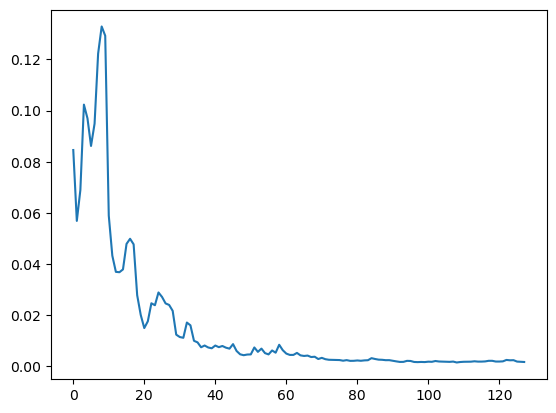

In [13]:
import matplotlib.pyplot as plt
plt.plot(train_mel[0])

In [6]:
def get_mfcc_feature(df):
    features = []
#     for path in tqdm(df['path']):
        
#         y, sr = librosa.load(path, sr=CFG['SR'])
#         y = list(y)
#         y.extend([0 for _ in range(80100-len(y))])
#         features.append(y)
    for path in tqdm(df['path']):
        # librosa패키지를 사용하여 wav 파일 load
        y, sr = librosa.load(path, sr=CFG['SR'])
        # librosa패키지를 사용하여 mfcc 추출
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=CFG['N_MFCC'])
        y_feature = []
        # 추출된 MFCC들의 평균을 Feature로 사용
        for e in mfcc:
            y_feature.append(np.mean(e))
        features.append(y_feature)
    return features
    # return pd.DataFrame(features,columns=['freq'])

vector = get_mfcc_feature(train_df)
test = get_mfcc_feature(test_df)

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/1881 [00:00<?, ?it/s]

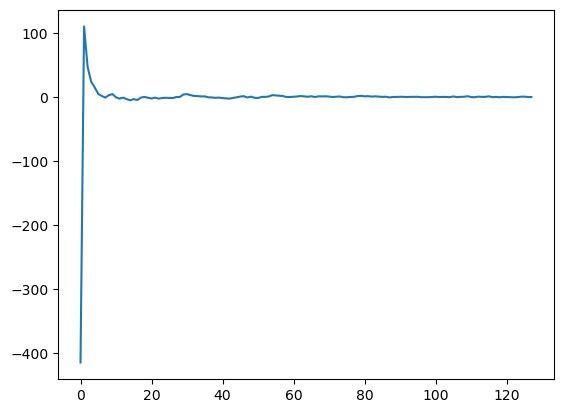

In [14]:
plt.plot(vector[0])

In [15]:
# train_df[train_df['label'] == 0].index

In [16]:
# from sklearn.decomposition import PCA
# pca 

# pd.DataFrameFrame(vector.iloc[])

In [17]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=600)
# pca.fit(vector)
# target = pd.DataFrame(pca.transform(vector))
# target.to_csv('./origin_600_pca.csv')

In [18]:
# import numpy as np
# max([len(i) for i in test])

In [19]:
# test = pd.DataFrame(pca.transform(test))
# test.to_csv('./test_600_pca.csv')

# print(sum(pca.explained_variance_ratio_))

In [56]:
target = pd.read_csv('./origin_600_pca.csv')
conc = pd.DataFrame([list(reversed(list(target.iloc[i,:]))) for i in range(len(target))])

In [57]:
conc = conc.rename(columns={i:f'pca_{i}' for i in range(600)})
target = target.rename(columns={f'{i}':f'pca_{i}' for i in range(600)}).drop('Unnamed: 0',axis=1)

In [58]:
target = pd.concat([target,conc])
target

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_591,pca_592,pca_593,pca_594,pca_595,pca_596,pca_597,pca_598,pca_599,600
0,-0.021385,-0.012949,-0.015279,-0.011877,-0.025111,0.009895,-0.004037,-0.033308,0.008773,-0.014967,...,-0.021627,0.009855,0.002213,-0.011496,-0.020011,0.005312,-0.015379,-0.011613,-0.010847,NaN
1,0.000776,-0.021042,-0.005029,-0.016736,-0.010840,0.002814,-0.008290,-0.016119,-0.025994,-0.004446,...,-0.002577,0.012465,-0.003917,-0.002894,-0.017801,-0.007558,-0.012204,0.038600,-0.011025,NaN
2,0.052751,-0.054740,0.227633,0.128646,0.051232,0.086255,0.112322,-0.093411,-0.011321,-0.141729,...,-0.227377,0.047490,-0.014826,0.002115,0.098491,-0.055566,-0.131283,0.103348,0.003722,NaN
3,-0.002264,-0.053758,-0.065805,0.123830,-0.039335,-0.074199,0.080589,-0.034714,-0.094504,0.037295,...,0.246421,-0.030732,-0.010940,-0.126216,-0.159515,-0.083252,-0.060753,0.230066,-0.048657,NaN
4,0.012149,-0.100497,-0.033590,-0.113659,-0.128520,0.049028,-0.172694,-0.074595,0.006177,-0.125284,...,-0.055523,-0.011672,-0.177221,-0.020595,-0.111046,0.211206,0.203578,0.103752,-0.055185,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,-0.042877,-0.006561,-0.053777,-0.060315,-0.113231,0.025670,-0.042992,-0.027823,0.031745,0.033578,...,-0.062950,0.028914,0.007278,0.021489,0.004603,0.027164,-0.033432,-0.003941,0.004596,4996.0
4997,-0.110533,0.090996,0.126189,-0.044549,0.112800,-0.046879,-0.038362,-0.013591,-0.098096,0.214015,...,-1.044811,0.535062,-0.007586,-1.326804,-1.387200,-0.482458,-0.340060,-0.451134,-0.048009,4997.0
4998,-0.166486,0.070321,0.038598,-0.022319,-0.027345,0.090069,-0.003661,0.055641,-0.104162,-0.005171,...,0.005387,-0.079840,0.028089,0.177551,-0.074893,-0.156975,0.098310,-0.082456,0.011474,4998.0
4999,-0.052966,0.044866,0.057982,0.035652,0.082762,-0.037150,0.041298,-0.040216,-0.000206,-0.048188,...,0.010496,-0.027867,0.025754,-0.044363,-0.007708,-0.009071,-0.006900,-0.049939,-0.021732,4999.0


In [32]:
vector = pd.DataFrame(vector,columns=[f'mfcc_{i}' for i in range(128)])
train = pd.DataFrame(train_mel,columns=[f'mel_{i}' for i in range(128)])
train = train.rename(columns={f'{i}':f'mel_{i}' for i in range(128)})
train = pd.concat([train,vector],axis=1)
train

,mel_0,mel_1,mel_2,mel_3,mel_4,mel_5,mel_6,mel_7,mel_8,mel_9,...,mfcc_118,mfcc_119,mfcc_120,mfcc_121,mfcc_122,mfcc_123,mfcc_124,mfcc_125,mfcc_126,mfcc_127
0,0.084566,0.056834,0.068925,0.102323,0.096968,0.086162,0.094872,0.122292,0.132902,0.129273,...,-0.475243,0.129531,-0.105115,-0.443991,-0.567217,-0.303936,0.407998,0.501475,-0.109036,-0.058341
1,0.098563,0.052329,0.056681,0.061517,0.081819,0.106868,0.138239,0.107013,0.144104,0.120996,...,0.629086,0.514676,-0.314312,-0.197818,-0.422195,0.004201,-0.217671,0.523408,0.020408,0.070081
2,0.083089,0.055145,0.060235,0.078781,0.078231,0.141836,0.142165,0.156169,0.129583,0.136608,...,-0.282975,-0.356842,-0.286292,-0.212861,-0.013879,-0.709901,-0.594326,-0.343695,-0.338751,-0.171855
3,0.020401,0.055993,0.088625,0.112177,0.166121,0.092082,0.082991,0.106938,0.118478,0.130794,...,0.205021,0.189386,-0.311290,-0.363777,-0.499418,-1.088192,-0.685789,0.120570,-0.686173,-0.157100
4,0.074340,0.047811,0.056292,0.110727,0.126938,0.169690,0.195548,0.141796,0.155485,0.272525,...,-0.996368,0.035772,-0.338776,-1.020306,-1.039265,-0.053770,0.154234,0.168258,-0.575030,-1.013336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.021166,0.058369,0.111723,0.110858,0.119897,0.068029,0.117166,0.131592,0.119517,0.130425,...,0.023185,0.064578,0.330306,-0.484907,0.141396,0.035094,-0.244010,0.037486,-0.131850,-0.035452
4997,0.094659,0.061243,0.070688,0.099395,0.105742,0.081150,0.080464,0.094489,0.137502,0.163564,...,0.731323,-0.307702,0.357692,-0.328093,-0.237218,-0.570983,0.324473,-0.349720,-0.755602,-0.222972
4998,0.120308,0.064221,0.062565,0.062162,0.088277,0.158967,0.121889,0.090846,0.138761,0.148893,...,-0.083660,0.774606,-0.375394,-0.750303,-0.261566,-0.420591,0.519029,0.504589,-0.008825,-0.609881
4999,0.074006,0.055329,0.062009,0.098595,0.098970,0.073677,0.073534,0.102842,0.120538,0.151261,...,0.015787,-0.581784,-0.564808,-0.924709,-0.827350,-0.884314,-0.117483,-0.039797,0.120998,-0.864221


In [109]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [159]:
def build_model():
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=[len(train.keys())]),
        layers.Dense(1024, activation='relu'),
        # layers.MaxPooling1D(pool_size=2,strides=1, padding='valid'),
        layers.Dense(512),
        # layers.Dropout(0.1),
        layers.Dense(6,activation='softmax')
        ])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer='adam',
                metrics=['accuracy'])
    return model
model = build_model()

In [160]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_113 (Dense)            (None, 1024)              263168    
_________________________________________________________________
dense_114 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_115 (Dense)            (None, 6)                 3078      
Total params: 856,838
Trainable params: 856,838
Non-trainable params: 0
_________________________________________________________________


In [170]:
import sklearn
skf = sklearn.model_selection.StratifiedKFold(n_splits=10)
for i, (train_index, test_index) in enumerate(skf.split(train, train_df['label'])):
#     print(f"Fold {i}:")
#     print(f"  Train: index={train_index}")
#     print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 421  439  447 ... 4998 4999 5000]
  Test:  index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 2

In [172]:
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 100 == 0: print('')
#         print('.', end='')

# EPOCHS = 1000

# history = model.fit(
#   train, train_df['label'],
#   epochs=EPOCHS, validation_split = 0.1, verbose=0,
#   callbacks=[PrintDot()])



skf = sklearn.model_selection.StratifiedKFold(n_splits=10)
models = []
for i, (train_index, test_index) in enumerate(skf.split(train, train_df['label'])):
    model.fit(train.loc[train_index,:]
              , train_df.loc[train_index,'label']
              , epochs=100
              , validation_data=(train.loc[test_index,:],train_df.loc[test_index,'label'])) # validation_split=0.1,
    models.append(model)

Epoch 1/100
141/141 [==============================] - 0s 3ms/step - loss: 1.8575 - accuracy: 0.4104 - val_loss: 1.3915 - val_accuracy: 0.4311
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 1.3434 - accuracy: 0.4427 - val_loss: 1.2311 - val_accuracy: 0.4890
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 1.2444 - accuracy: 0.4924 - val_loss: 1.1622 - val_accuracy: 0.5309
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 1.1512 - accuracy: 0.5316 - val_loss: 1.1299 - val_accuracy: 0.5409
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 1.0617 - accuracy: 0.5816 - val_loss: 1.0121 - val_accuracy: 0.6068
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.9346 - accuracy: 0.6380 - val_loss: 0.8297 - val_accuracy: 0.7166
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.7844 - accuracy: 0.7147 - val_loss: 0.5800 - val_accuracy: 0.7665

Epoch 58/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.9802 - val_loss: 1.3832 - val_accuracy: 0.7645
Epoch 59/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9851 - val_loss: 1.0121 - val_accuracy: 0.7944
Epoch 60/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9882 - val_loss: 1.2712 - val_accuracy: 0.7804
Epoch 61/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9942 - val_loss: 0.9444 - val_accuracy: 0.8204
Epoch 62/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.7690 - val_accuracy: 0.8543
Epoch 63/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.8199 - val_accuracy: 0.8383
Epoch 64/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.8914 - val_accuracy:

Epoch 14/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.9751 - val_loss: 0.5212 - val_accuracy: 0.8820
Epoch 15/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1210 - accuracy: 0.9605 - val_loss: 0.1721 - val_accuracy: 0.9500
Epoch 16/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9824 - val_loss: 0.2917 - val_accuracy: 0.9260
Epoch 17/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 0.9760 - val_loss: 0.3176 - val_accuracy: 0.9240
Epoch 18/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9782 - val_loss: 0.2955 - val_accuracy: 0.9180
Epoch 19/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9858 - val_loss: 0.2385 - val_accuracy: 0.9280
Epoch 20/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.9782 - val_loss: 0.2751 - val_accuracy:

Epoch 70/100
141/141 [==============================] - 0s 3ms/step - loss: 8.3242e-06 - accuracy: 1.0000 - val_loss: 0.2312 - val_accuracy: 0.9440
Epoch 71/100
141/141 [==============================] - 0s 3ms/step - loss: 7.8012e-06 - accuracy: 1.0000 - val_loss: 0.2315 - val_accuracy: 0.9440
Epoch 72/100
141/141 [==============================] - 0s 3ms/step - loss: 7.3147e-06 - accuracy: 1.0000 - val_loss: 0.2320 - val_accuracy: 0.9440
Epoch 73/100
141/141 [==============================] - 0s 3ms/step - loss: 6.8255e-06 - accuracy: 1.0000 - val_loss: 0.2321 - val_accuracy: 0.9440
Epoch 74/100
141/141 [==============================] - 0s 3ms/step - loss: 6.3719e-06 - accuracy: 1.0000 - val_loss: 0.2327 - val_accuracy: 0.9440
Epoch 75/100
141/141 [==============================] - 0s 3ms/step - loss: 5.9555e-06 - accuracy: 1.0000 - val_loss: 0.2323 - val_accuracy: 0.9440
Epoch 76/100
141/141 [==============================] - 0s 3ms/step - loss: 5.5709e-06 - accuracy: 1.0000 - val_

141/141 [==============================] - 0s 3ms/step - loss: 0.0616 - accuracy: 0.9807 - val_loss: 0.2680 - val_accuracy: 0.9200
Epoch 27/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9822 - val_loss: 0.4243 - val_accuracy: 0.9140
Epoch 28/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9816 - val_loss: 0.1974 - val_accuracy: 0.9480
Epoch 29/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9856 - val_loss: 0.1276 - val_accuracy: 0.9540
Epoch 30/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9860 - val_loss: 0.3098 - val_accuracy: 0.9420
Epoch 31/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0831 - accuracy: 0.9787 - val_loss: 0.3491 - val_accuracy: 0.9340
Epoch 32/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9900 - val_loss: 0.2305 - val_accuracy: 0.9540
Epoch

141/141 [==============================] - 0s 3ms/step - loss: 9.3465e-06 - accuracy: 1.0000 - val_loss: 0.2485 - val_accuracy: 0.9540
Epoch 83/100
141/141 [==============================] - 0s 3ms/step - loss: 8.7753e-06 - accuracy: 1.0000 - val_loss: 0.2486 - val_accuracy: 0.9540
Epoch 84/100
141/141 [==============================] - 0s 3ms/step - loss: 8.2737e-06 - accuracy: 1.0000 - val_loss: 0.2486 - val_accuracy: 0.9540
Epoch 85/100
141/141 [==============================] - 0s 3ms/step - loss: 7.7742e-06 - accuracy: 1.0000 - val_loss: 0.2487 - val_accuracy: 0.9540
Epoch 86/100
141/141 [==============================] - 0s 3ms/step - loss: 7.3287e-06 - accuracy: 1.0000 - val_loss: 0.2489 - val_accuracy: 0.9540
Epoch 87/100
141/141 [==============================] - 0s 3ms/step - loss: 6.8915e-06 - accuracy: 1.0000 - val_loss: 0.2489 - val_accuracy: 0.9540
Epoch 88/100
141/141 [==============================] - 0s 3ms/step - loss: 6.5162e-06 - accuracy: 1.0000 - val_loss: 0.2491 

141/141 [==============================] - 0s 3ms/step - loss: 2.7185e-05 - accuracy: 1.0000 - val_loss: 0.0557 - val_accuracy: 0.9920
Epoch 39/100
141/141 [==============================] - 0s 3ms/step - loss: 2.5147e-05 - accuracy: 1.0000 - val_loss: 0.0558 - val_accuracy: 0.9900
Epoch 40/100
141/141 [==============================] - 0s 3ms/step - loss: 2.3270e-05 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9900
Epoch 41/100
141/141 [==============================] - 0s 3ms/step - loss: 2.1601e-05 - accuracy: 1.0000 - val_loss: 0.0563 - val_accuracy: 0.9900
Epoch 42/100
141/141 [==============================] - 0s 3ms/step - loss: 2.0015e-05 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 0.9900
Epoch 43/100
141/141 [==============================] - 0s 3ms/step - loss: 1.8554e-05 - accuracy: 1.0000 - val_loss: 0.0566 - val_accuracy: 0.9880
Epoch 44/100
141/141 [==============================] - 0s 3ms/step - loss: 1.7197e-05 - accuracy: 1.0000 - val_loss: 0.0566 

141/141 [==============================] - 0s 3ms/step - loss: 5.5240e-07 - accuracy: 1.0000 - val_loss: 0.0756 - val_accuracy: 0.9880
Epoch 94/100
141/141 [==============================] - 0s 3ms/step - loss: 5.1452e-07 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9880
Epoch 95/100
141/141 [==============================] - 0s 3ms/step - loss: 4.7872e-07 - accuracy: 1.0000 - val_loss: 0.0770 - val_accuracy: 0.9880
Epoch 96/100
141/141 [==============================] - 0s 3ms/step - loss: 4.4654e-07 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9880
Epoch 97/100
141/141 [==============================] - 0s 3ms/step - loss: 4.1571e-07 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9880
Epoch 98/100
141/141 [==============================] - 0s 3ms/step - loss: 3.8708e-07 - accuracy: 1.0000 - val_loss: 0.0783 - val_accuracy: 0.9880
Epoch 99/100
141/141 [==============================] - 0s 3ms/step - loss: 3.6088e-07 - accuracy: 1.0000 - val_loss: 0.0787 

141/141 [==============================] - 0s 3ms/step - loss: 2.2666e-05 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 0.9840
Epoch 50/100
141/141 [==============================] - 0s 3ms/step - loss: 2.0918e-05 - accuracy: 1.0000 - val_loss: 0.0378 - val_accuracy: 0.9860
Epoch 51/100
141/141 [==============================] - 0s 3ms/step - loss: 1.9333e-05 - accuracy: 1.0000 - val_loss: 0.0371 - val_accuracy: 0.9860
Epoch 52/100
141/141 [==============================] - 0s 3ms/step - loss: 1.7872e-05 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 0.9860
Epoch 53/100
141/141 [==============================] - 0s 3ms/step - loss: 1.6642e-05 - accuracy: 1.0000 - val_loss: 0.0357 - val_accuracy: 0.9860
Epoch 54/100
141/141 [==============================] - 0s 3ms/step - loss: 1.5452e-05 - accuracy: 1.0000 - val_loss: 0.0350 - val_accuracy: 0.9860
Epoch 55/100
141/141 [==============================] - 0s 3ms/step - loss: 1.4373e-05 - accuracy: 1.0000 - val_loss: 0.0342 

141/141 [==============================] - 0s 3ms/step - loss: 0.2257 - accuracy: 0.9353 - val_loss: 0.2809 - val_accuracy: 0.9340
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.9729 - val_loss: 0.1650 - val_accuracy: 0.9440
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1008 - accuracy: 0.9745 - val_loss: 0.0664 - val_accuracy: 0.9740
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0904 - accuracy: 0.9773 - val_loss: 0.2071 - val_accuracy: 0.9460
Epoch 8/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9896 - val_loss: 0.0479 - val_accuracy: 0.9840
Epoch 9/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9918 - val_loss: 0.0926 - val_accuracy: 0.9740
Epoch 10/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9920 - val_loss: 0.1030 - val_accuracy: 0.9660
Epoch 11/1

141/141 [==============================] - 0s 3ms/step - loss: 6.7814e-06 - accuracy: 1.0000 - val_loss: 0.0622 - val_accuracy: 0.9880
Epoch 61/100
141/141 [==============================] - 0s 3ms/step - loss: 6.3477e-06 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 0.9880
Epoch 62/100
141/141 [==============================] - 0s 3ms/step - loss: 5.9247e-06 - accuracy: 1.0000 - val_loss: 0.0625 - val_accuracy: 0.9880
Epoch 63/100
141/141 [==============================] - 0s 3ms/step - loss: 5.5307e-06 - accuracy: 1.0000 - val_loss: 0.0628 - val_accuracy: 0.9880
Epoch 64/100
141/141 [==============================] - 0s 3ms/step - loss: 5.1765e-06 - accuracy: 1.0000 - val_loss: 0.0628 - val_accuracy: 0.9880
Epoch 65/100
141/141 [==============================] - 0s 3ms/step - loss: 4.8264e-06 - accuracy: 1.0000 - val_loss: 0.0629 - val_accuracy: 0.9880
Epoch 66/100
141/141 [==============================] - 0s 3ms/step - loss: 4.5078e-06 - accuracy: 1.0000 - val_loss: 0.0632 

Epoch 16/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9882 - val_loss: 0.1345 - val_accuracy: 0.9680
Epoch 17/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9947 - val_loss: 0.1796 - val_accuracy: 0.9720
Epoch 18/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0698 - accuracy: 0.9829 - val_loss: 0.3134 - val_accuracy: 0.9440
Epoch 19/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0906 - accuracy: 0.9791 - val_loss: 0.0887 - val_accuracy: 0.9760
Epoch 20/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1014 - accuracy: 0.9762 - val_loss: 0.2053 - val_accuracy: 0.9460
Epoch 21/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9836 - val_loss: 0.1189 - val_accuracy: 0.9860
Epoch 22/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9971 - val_loss: 0.1422 - val_accuracy:

141/141 [==============================] - 0s 3ms/step - loss: 2.0961e-06 - accuracy: 1.0000 - val_loss: 0.0767 - val_accuracy: 0.9820
Epoch 72/100
141/141 [==============================] - 0s 3ms/step - loss: 1.9619e-06 - accuracy: 1.0000 - val_loss: 0.0763 - val_accuracy: 0.9820
Epoch 73/100
141/141 [==============================] - 0s 3ms/step - loss: 1.8310e-06 - accuracy: 1.0000 - val_loss: 0.0759 - val_accuracy: 0.9820
Epoch 74/100
141/141 [==============================] - 0s 3ms/step - loss: 1.7121e-06 - accuracy: 1.0000 - val_loss: 0.0756 - val_accuracy: 0.9820
Epoch 75/100
141/141 [==============================] - 0s 3ms/step - loss: 1.5996e-06 - accuracy: 1.0000 - val_loss: 0.0753 - val_accuracy: 0.9820
Epoch 76/100
141/141 [==============================] - 0s 3ms/step - loss: 1.4925e-06 - accuracy: 1.0000 - val_loss: 0.0750 - val_accuracy: 0.9820
Epoch 77/100
141/141 [==============================] - 0s 3ms/step - loss: 1.3900e-06 - accuracy: 1.0000 - val_loss: 0.0748 

141/141 [==============================] - 0s 3ms/step - loss: 5.3979e-05 - accuracy: 1.0000 - val_loss: 0.0686 - val_accuracy: 0.9900
Epoch 28/100
141/141 [==============================] - 0s 3ms/step - loss: 4.8266e-05 - accuracy: 1.0000 - val_loss: 0.0680 - val_accuracy: 0.9900
Epoch 29/100
141/141 [==============================] - 0s 3ms/step - loss: 4.3300e-05 - accuracy: 1.0000 - val_loss: 0.0675 - val_accuracy: 0.9900
Epoch 30/100
141/141 [==============================] - 0s 3ms/step - loss: 3.9159e-05 - accuracy: 1.0000 - val_loss: 0.0669 - val_accuracy: 0.9900
Epoch 31/100
141/141 [==============================] - 0s 3ms/step - loss: 3.5506e-05 - accuracy: 1.0000 - val_loss: 0.0664 - val_accuracy: 0.9900
Epoch 32/100
141/141 [==============================] - 0s 3ms/step - loss: 3.2349e-05 - accuracy: 1.0000 - val_loss: 0.0660 - val_accuracy: 0.9880
Epoch 33/100
141/141 [==============================] - 0s 3ms/step - loss: 2.9452e-05 - accuracy: 1.0000 - val_loss: 0.0654 

141/141 [==============================] - 0s 3ms/step - loss: 8.7765e-07 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9860
Epoch 83/100
141/141 [==============================] - 0s 3ms/step - loss: 8.1276e-07 - accuracy: 1.0000 - val_loss: 0.0590 - val_accuracy: 0.9860
Epoch 84/100
141/141 [==============================] - 0s 3ms/step - loss: 7.5728e-07 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9860
Epoch 85/100
141/141 [==============================] - 0s 3ms/step - loss: 7.0468e-07 - accuracy: 1.0000 - val_loss: 0.0584 - val_accuracy: 0.9860
Epoch 86/100
141/141 [==============================] - 0s 3ms/step - loss: 6.5714e-07 - accuracy: 1.0000 - val_loss: 0.0584 - val_accuracy: 0.9860
Epoch 87/100
141/141 [==============================] - 0s 3ms/step - loss: 6.1365e-07 - accuracy: 1.0000 - val_loss: 0.0583 - val_accuracy: 0.9860
Epoch 88/100
141/141 [==============================] - 0s 3ms/step - loss: 5.7234e-07 - accuracy: 1.0000 - val_loss: 0.0583 

141/141 [==============================] - 0s 3ms/step - loss: 0.0878 - accuracy: 0.9816 - val_loss: 0.4438 - val_accuracy: 0.9260
Epoch 39/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.9787 - val_loss: 0.4081 - val_accuracy: 0.9320
Epoch 40/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0821 - accuracy: 0.9804 - val_loss: 0.4421 - val_accuracy: 0.9360
Epoch 41/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9904 - val_loss: 0.2005 - val_accuracy: 0.9540
Epoch 42/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0676 - accuracy: 0.9844 - val_loss: 0.4683 - val_accuracy: 0.9300
Epoch 43/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0665 - accuracy: 0.9844 - val_loss: 0.5540 - val_accuracy: 0.9220
Epoch 44/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.9871 - val_loss: 0.3595 - val_accuracy: 0.9400
Epoch

141/141 [==============================] - 0s 3ms/step - loss: 6.1954e-06 - accuracy: 1.0000 - val_loss: 0.4405 - val_accuracy: 0.9380
Epoch 95/100
141/141 [==============================] - 0s 3ms/step - loss: 5.8161e-06 - accuracy: 1.0000 - val_loss: 0.4401 - val_accuracy: 0.9380
Epoch 96/100
141/141 [==============================] - 0s 3ms/step - loss: 5.4611e-06 - accuracy: 1.0000 - val_loss: 0.4398 - val_accuracy: 0.9360
Epoch 97/100
141/141 [==============================] - 0s 3ms/step - loss: 5.1377e-06 - accuracy: 1.0000 - val_loss: 0.4393 - val_accuracy: 0.9360
Epoch 98/100
141/141 [==============================] - 0s 3ms/step - loss: 4.7913e-06 - accuracy: 1.0000 - val_loss: 0.4390 - val_accuracy: 0.9360
Epoch 99/100
141/141 [==============================] - 0s 3ms/step - loss: 4.4839e-06 - accuracy: 1.0000 - val_loss: 0.4387 - val_accuracy: 0.9360
Epoch 100/100
141/141 [==============================] - 0s 3ms/step - loss: 4.2021e-06 - accuracy: 1.0000 - val_loss: 0.4384

Epoch 51/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.9844 - val_loss: 0.4276 - val_accuracy: 0.9360
Epoch 52/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0694 - accuracy: 0.9864 - val_loss: 0.5610 - val_accuracy: 0.9340
Epoch 53/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1597 - accuracy: 0.9756 - val_loss: 1.7832 - val_accuracy: 0.8580
Epoch 54/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1626 - accuracy: 0.9769 - val_loss: 0.4020 - val_accuracy: 0.9140
Epoch 55/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9911 - val_loss: 0.5325 - val_accuracy: 0.9080
Epoch 56/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9907 - val_loss: 0.4770 - val_accuracy: 0.9260
Epoch 57/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9911 - val_loss: 0.3435 - val_accuracy:

In [163]:
# vector = get_mfcc_feature(test_df)

In [164]:
test = pd.DataFrame(test_mel,columns=[f'mel_{i}' for i in range(128)])
vector = pd.DataFrame(vector,columns=[f'mfcc_{i}' for i in range(128)])
test = pd.concat([test,vector],axis=1)

In [173]:
models

In [183]:
preds = [i.predict(test) for i in models]
preds = [np.argmax(i) for i in np.array(preds).mean(axis=0)]

In [184]:
submission = pd.read_csv('./sample_submission.csv')
submission['label'] = preds
submission.to_csv('./baseline_submission.csv', index=False)